In [110]:
from sage.all import *

In [111]:
%display latex

var('a, b, c, n, P, x, y, z, dx, dy')

(a, b, c, n, P, x, y, z, dx, dy)

In [112]:
a_n = SR.var('a', 5)
a_n

(a0, a1, a2, a3, a4)

In [149]:
R_n = SR.var('R', 5)
R_n

(R0, R1, R2, R3, R4)

In [113]:
def series(expr, limit=(1,10)): return [*map(lambda n: expr, range(limit[0], limit[1]) )]

# Taylor Polynomials and Approximations.

## Topics:

- Maclaurin and Taylor polynomials.
- Taylor’s theorem with remainder.

## Definitions and Theorems:

- **Maclaurin polynomial:** Let $f$ have n derivatives at 0. The $n^{th}$-degree Maclaurin polynomial for $f$ is 

$P_n(x) = f(0) + f’(0)x + \frac{f’’(0)}{2!} x^2 +...+ \frac{f(n)(0)}{n!} x^n$.


- **Taylor polynomial:** Let $f$ have n derivatives at c. The $n^{th}$-degree Taylor polynomial for $f$ at c is

    $P_n(x) = f(c) + f’(c)(x - c) + \frac{f’’(0)}{2!}(x - c)^2 +...+ \frac{f^{(n)} (c)}{n!} (x- c)^n$.



- **Taylor’s theorem:** Let $f$ be differentiable through order n + 1 on an interval containing c. Then, there exist a number z between x and c such that

    $f(x) = f(c) + f‘(c)(x - c) + \frac{f‘‘(c)}{2!}(x- c)^2 +...+ \frac{f^{(n)} (c)}{n!}(x - c)^n + R_n (x)$,

    wehere $R_n(x) = \frac{f^{(n+1) (z)}}{(n+1)!}(x - c)^{n+1}$. That is $|R_n(x)| ≤ \frac|x -c|^{n+1}{(n + 1)!}$ $max|f^{n+1} (z)|$.

## Example 1:

Finding a Maclaurin Polynomial.

Find the first-degree Maclaurin polynomial for $f(x) = e^x$.

The polynomial $P_1(x) = a_0 + a_1 x$. satisfies $a_0 = f(0) = e^0 = 1 and a_1 = f’(0) = e^0 = 1$. Hence, $P_1(x) = 1 + x$.

This polynomial agrees with $f(x) = e^x$ at the point (0,1) and agrees with the derivative at that point. Notice
that this polynomial is nothing more than the tangent line to the curve at the point $x = 0$.

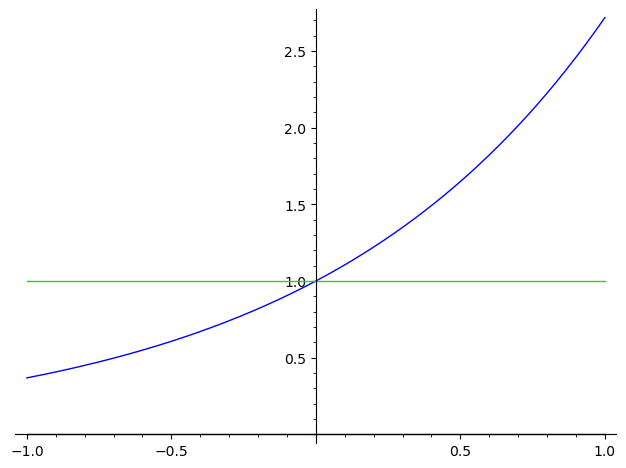

In [225]:
plot(e^x)+plot([0,1])


## Example 2:

Finding a Taylor Polynomial.

Find the third-degree Taylor polynomial for $f(x = lnx)$ centered at $c = 1$.

We evaluate the function and its derivatives at 1.

In [115]:
c = 1

In [116]:
f(x) = log(x)

In [117]:
f(x) == derivative(1/x), derivative(log(1))

(log(x) == -1/x^2, 0)

In [118]:
f(x) == derivative(derivative(1/x)), derivative(derivative(1/log(x), x, 1))

(log(x) == 2/x^3, 1/(x^2*log(x)^2) + 2/(x^2*log(x)^3))

In [119]:
f(x) == derivative(derivative(derivative(1/x))), derivative(derivative(derivative(1/log(x)), x, 1))

(log(x) == -6/x^4, -2/(x^3*log(x)^2) - 6/(x^3*log(x)^3) - 6/(x^3*log(x)^4))

In [120]:
fn(x) = derivative(derivative(derivative(1/log(x)), x, 1))

In [121]:
fn(2)

-1/4/log(2)^2 - 3/4/log(2)^3 - 3/4/log(2)^4

Next, we apply the definition of the Taylor polynomial.

In [128]:
P(x) = f(c) + derivative(f(c)*(x - c)) + (derivative(derivative(f(c))) / factorial(2)) * (x - c)^2 + (derivative(derivative(derivative(f(c)))) / factorial(3)) * (x - c)^2

In [130]:
P(x) == P(1)

0 == 0

From the graph, you can see that the polynomial is a good approximation of the function near the point $c = 1$.

verbose 0 (3954: plot.py, generate_plot_points) WARNING: When plotting, failed to evaluate function at 100 points.
verbose 0 (3954: plot.py, generate_plot_points) Last error message: 'Unable to compute f(-0.009000909751483103)'


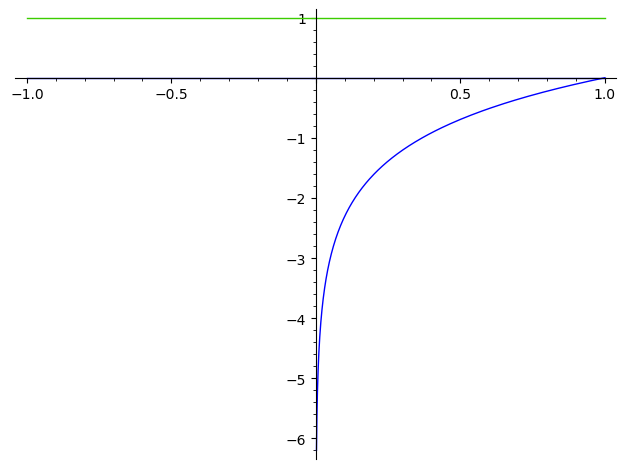

In [226]:
plot(f(x))+plot([0,1])

In [131]:
P(x) == P(1), (x - 1) - 1/2 * (x -1)^2 + 1/3 * (x -1)^3

(0 == 0, 1/3*(x - 1)^3 - 1/2*(x - 1)^2 + x - 1)

## Example 3:

Using Taylor’s Theorem.

The third-degree Maclaurin polynomial for $ f(x) = sin x$ is $P(x) = x - \frac{x^3}{3!}$. Use this polynomial to approximate $sin(0.1)$.
Then, use Taylor’s theorem to estimate the accuracy of this approximation. 

Substituting $x = 0.1$ into the polynomial, the approximation is $sin(0.1) ≈ P_3(0.1) = 0.1 - \frac{(0.1)^3}{3!} ≈ 0.099833$.

Taylor’s theorem says that,

In [151]:
assume(R_n[3] == 0.1)

we have the following error bound:

In [159]:
abs(R_n[3]) == abs((sin(z) / factorial(4))*(0.1)^4) <= (1/factorial(4)) * (0.1)^4 == (0.0001)/factorial(4), 0.000004

(abs(R3) == (4.16666666666667e-6)*abs(sin(z)), 4.00000000000000e-6)

You can verify that the actual error is

In [166]:
abs(P(0.1) - sin(x)) == 0.00000042

abs(sin(x)) == (4.20000000000000e-7)

In [251]:
data = [*map(lambda i: sum(x - (x^n/factorial(n)),n,0,i),range(1,10))]
data

[x - 1,
 -1/2*x^2 + 2*x - 1,
 -1/6*x^3 - 1/2*x^2 + 3*x - 1,
 -1/24*x^4 - 1/6*x^3 - 1/2*x^2 + 4*x - 1,
 -1/120*x^5 - 1/24*x^4 - 1/6*x^3 - 1/2*x^2 + 5*x - 1,
 -1/720*x^6 - 1/120*x^5 - 1/24*x^4 - 1/6*x^3 - 1/2*x^2 + 6*x - 1,
 -1/5040*x^7 - 1/720*x^6 - 1/120*x^5 - 1/24*x^4 - 1/6*x^3 - 1/2*x^2 + 7*x - 1,
 -1/40320*x^8 - 1/5040*x^7 - 1/720*x^6 - 1/120*x^5 - 1/24*x^4 - 1/6*x^3 - 1/2*x^2 + 8*x - 1,
 -1/362880*x^9 - 1/40320*x^8 - 1/5040*x^7 - 1/720*x^6 - 1/120*x^5 - 1/24*x^4 - 1/6*x^3 - 1/2*x^2 + 9*x - 1]

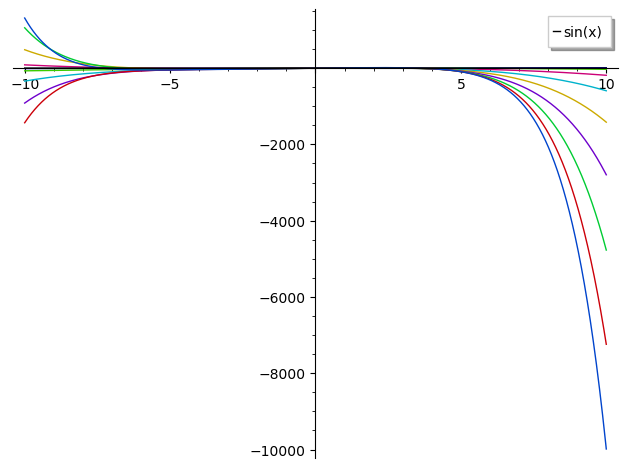

In [252]:
plot(data, xmin=-10, xmax=10) + plot(sin(x),  color="black", legend_label='sin(x)', xmin=-10, xmax=10) 